In [1]:
# Pip run

### Data Kelayakan Kartu Kredit: Faktor Penentu

Final Project Mechine Learning Indonesia AI

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [3]:
#Membaca data
data = pd.read_csv('dataset.csv')

In [4]:
#Mengganti nama data menjadi df_data
df_data = data.copy()

#dimensi data
print(df_data.shape)

(9709, 20)


In [5]:
df_data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [6]:
#Ringkasan dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

*data integer : 12 kolom* <br>
*data float : 3 kolom* <br>
*data object : 5 kolom*

In [7]:
#Melihat data yang duplikat 
df_data.duplicated().sum()

0

*data tidak memiliki data yang duplikat*

In [8]:
#Mengecek nilai kosong
df_data.isnull().mean()*100

ID                 0.0
Gender             0.0
Own_car            0.0
Own_property       0.0
Work_phone         0.0
Phone              0.0
Email              0.0
Unemployed         0.0
Num_children       0.0
Num_family         0.0
Account_length     0.0
Total_income       0.0
Age                0.0
Years_employed     0.0
Income_type        0.0
Education_type     0.0
Family_status      0.0
Housing_type       0.0
Occupation_type    0.0
Target             0.0
dtype: float64

*data tidak memiliki data yang kosong*

In [9]:
#Membuang kolom ID 
df_data.drop(columns = ['ID'], axis=1, inplace=True)
df_data

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [10]:
#Mengecek jumlah kategori disetiap kolom kategori

for i in df_data.columns:
    if df_data[str(i)].dtype =='O':

        print(i)
        print(len(df_data[str(i)].drop_duplicates()))

        if len(df_data[str(i)].drop_duplicates()) > 10:
            print('Hapus Kolom = ', str(i))
            df_data.drop(str(i), axis=1, inplace=True)

            print('')

Income_type
5
Education_type
5
Family_status
5
Housing_type
6
Occupation_type
19
Hapus Kolom =  Occupation_type



In [11]:
#Ringkasan Data
df_data.describe(include = 'O')

,Income_type,Education_type,Family_status,Housing_type
count,9709,9709,9709,9709
unique,5,5,5,6
top,Working,Secondary / secondary special,Married,House / apartment
freq,4960,6761,6530,8684


In [12]:
#Mengecek income_type future
np.unique(df_data['Income_type'])

array(['Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working'], dtype=object)

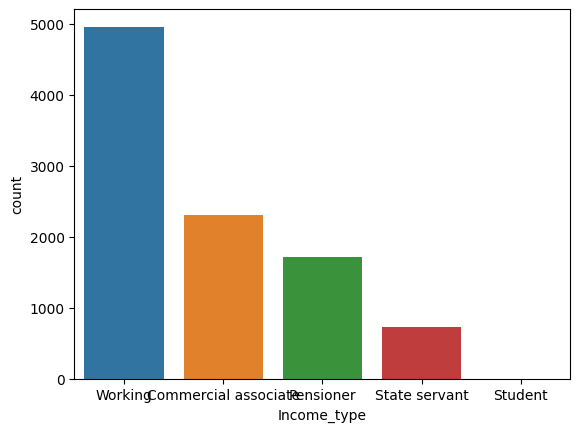

<Figure size 2000x2000 with 0 Axes>

In [13]:
sns.countplot(x='Income_type', data=df_data)
plt.figure(figsize=(20,20))
plt.show()


In [14]:
#Mengecek Family_Status future
np.unique(df_data['Family_status'])

array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

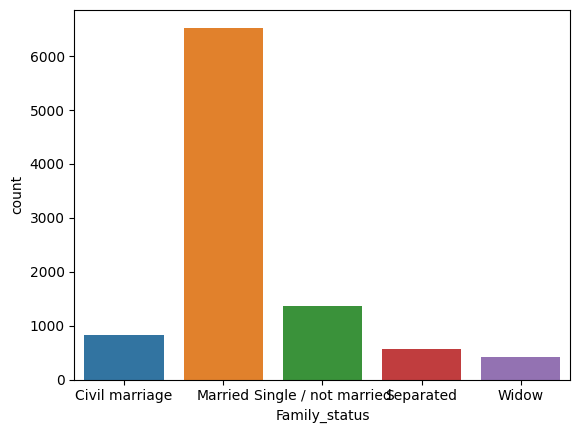

<Figure size 2000x2000 with 0 Axes>

In [15]:
sns.countplot(x='Family_status', data=df_data)
plt.figure(figsize=(20,20))
plt.show()

In [16]:
#Melihat proporsi data target
print(df_data['Target'].value_counts()/len(df_data['Target']))

0    0.867855
1    0.132145
Name: Target, dtype: float64


*data yang bernilai 0 867855* <br>
*data yang bernilai 1 132145* <br>
data ini menunjukkan ketimpangan antara 0 dan 1

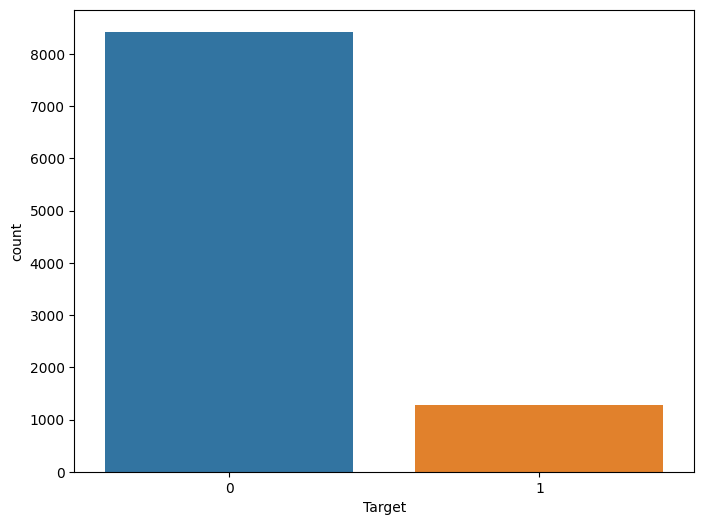

In [17]:
#visualisasi 
plt.figure(figsize=(8,6))
sns.countplot(x = df_data['Target']);
plt.show()

*sangat jomplang sekali data 0 dan 1*

In [18]:
#Melihat kolom kategori yang bertipe object

kategori = [var for var in df_data.columns if df_data[var].dtype == 'O']

print(kategori)

['Income_type', 'Education_type', 'Family_status', 'Housing_type']


In [19]:
#dirubah menjadi tipe category
for i in kategori:
    df_data[i] = df_data[i].astype('category')

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          9709 non-null   int64   
 1   Own_car         9709 non-null   int64   
 2   Own_property    9709 non-null   int64   
 3   Work_phone      9709 non-null   int64   
 4   Phone           9709 non-null   int64   
 5   Email           9709 non-null   int64   
 6   Unemployed      9709 non-null   int64   
 7   Num_children    9709 non-null   int64   
 8   Num_family      9709 non-null   int64   
 9   Account_length  9709 non-null   int64   
 10  Total_income    9709 non-null   float64 
 11  Age             9709 non-null   float64 
 12  Years_employed  9709 non-null   float64 
 13  Income_type     9709 non-null   category
 14  Education_type  9709 non-null   category
 15  Family_status   9709 non-null   category
 16  Housing_type    9709 non-null   category
 17  Target        

In [21]:
#Ringkasan data kategory
df_data.describe(include='category')

,Income_type,Education_type,Family_status,Housing_type
count,9709,9709,9709,9709
unique,5,5,5,6
top,Working,Secondary / secondary special,Married,House / apartment
freq,4960,6761,6530,8684


In [22]:
target = 'Target'

In [23]:
#Mengelompokkan data kategory dan data numerik
feature_kategory = [var for var in df_data.columns if df_data[var].dtype == 'category' and var!='Target']
feature_numerik = [var for var in df_data.columns if df_data[var].dtype != 'category' and var!='Target']

In [24]:
print(feature_kategory)
print(feature_numerik)

['Income_type', 'Education_type', 'Family_status', 'Housing_type']
['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']


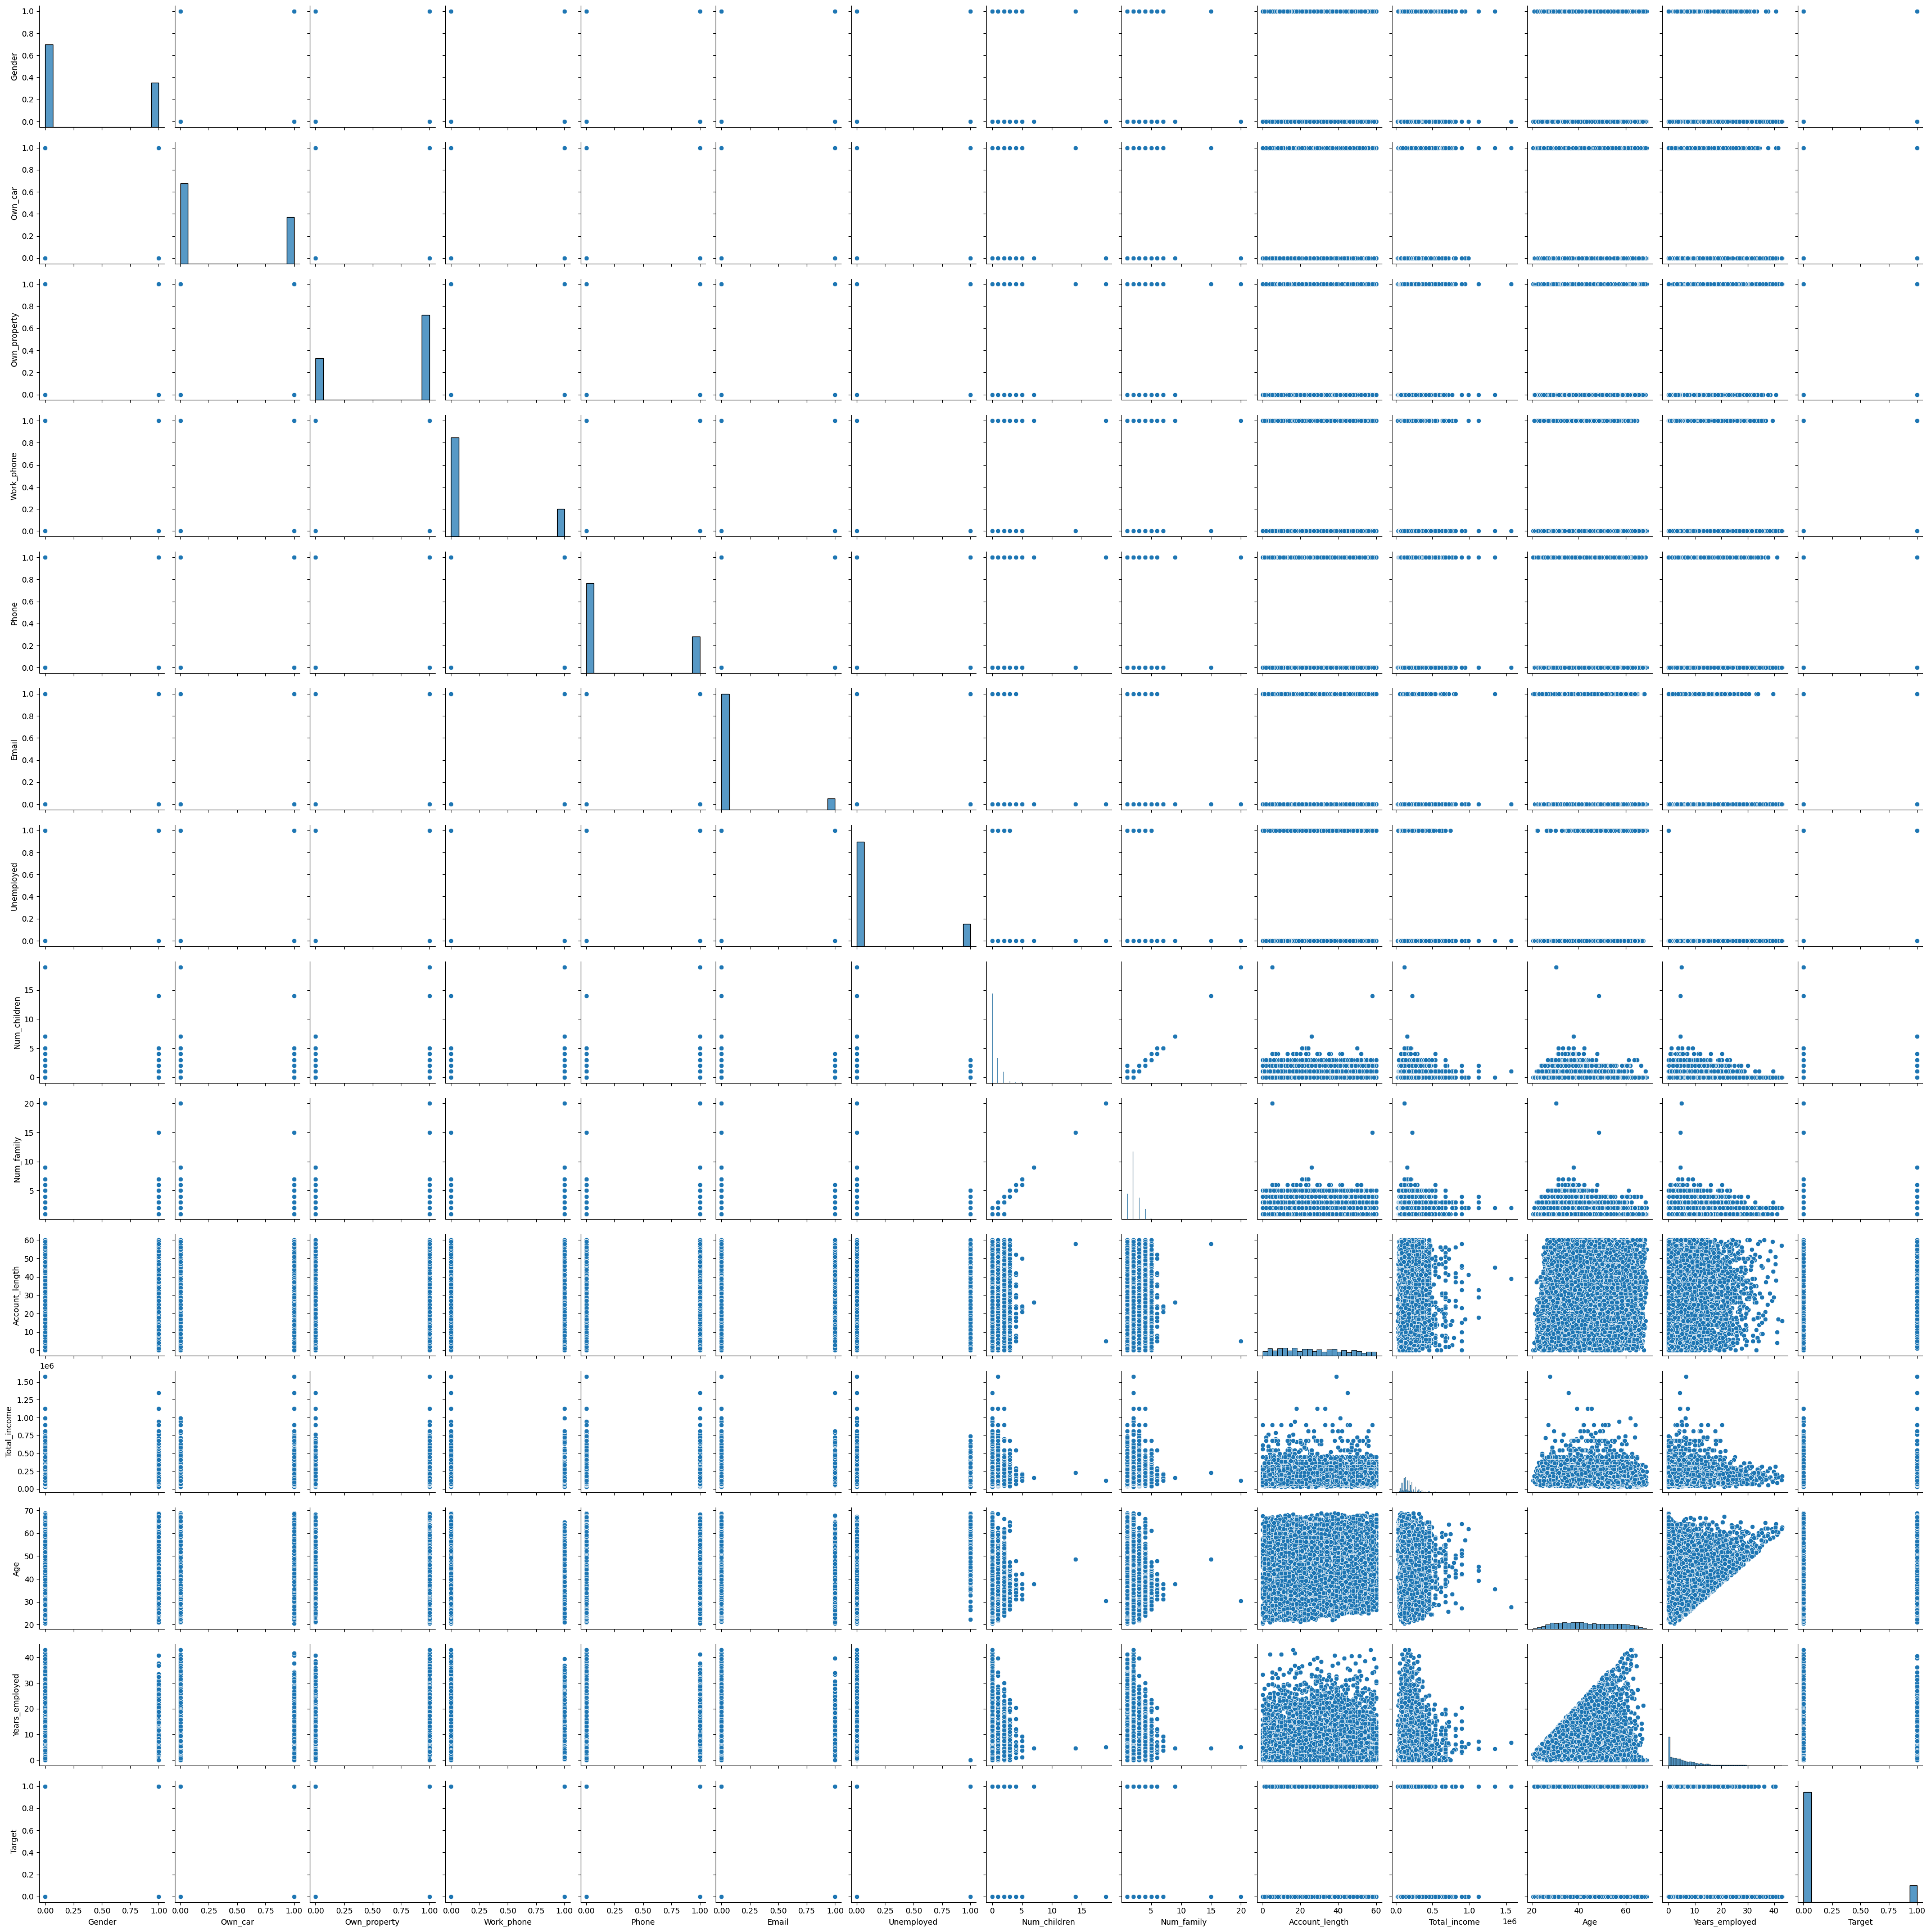

In [25]:
#Melihat pairplot
sns.pairplot(df_data)

### Menentukan Variabel X dan Variabel y

In [26]:
df_data.shape

(9709, 18)

In [27]:
#Membagi data 
X = df_data.iloc[:, df_data.columns != 'Target']
y = df_data['Target']

In [28]:
X.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment


In [29]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

### Spliting Dataset

In [30]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(7767, 17) (1942, 17)


### Balancing Dataset

In [31]:
# Melihat proporsi yang baru
print(y_train.value_counts()/len(y_train))

0    0.86713
1    0.13287
Name: Target, dtype: float64


In [32]:
# Melihat dimensi data
print(X_train.shape)
print(y_train.shape)

(7767, 17)
(7767,)


In [33]:
# Reset index X_train dan X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [34]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, feature_numerik),
    ('preprocessing kategori', preprocessor_kategori, feature_kategory)
])

In [35]:
# Model regresi logistik
logreg = LogisticRegression(random_state=123, max_iter=1000)

# Pipeline model regresi logistik
pipe_logreg = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=123)),
    ('logreg', logreg)
])

In [36]:
#fiting
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Own_car',
                                                   'Own_property', 'Work_phone',
                                                   'Phone', 'Email',
                                                   'Unemployed', 'Num_children',
                                                   'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Income_type',
                                                   'Education_type',
                                                   'Family_status',
                                                   'Housing_type'])])),
                ('smote', SMOTE(random_state=123)),
                ('logreg',
                 LogisticRegression(max_iter=1000, random_state=123))])

In [37]:
# Mencoba memprediksi test set
pred_test = pipe_logreg.predict(X_test)

# Merubahnya ke format Dataframe
pred_test = pd.DataFrame(pred_test, columns=['Target'])

# Melihat tmapilan y_pred
pred_test.head()

,Target
0,0
1,0
2,0
3,1
4,1


In [38]:
confuse_log = confusion_matrix(y_test, pred_test)
confuse_log

array([[961, 730],
       [120, 131]], dtype=int64)

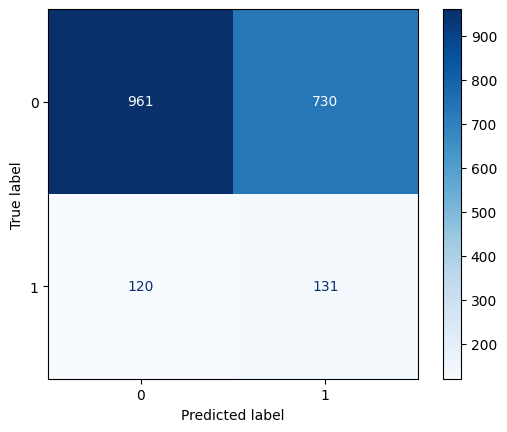

In [39]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = confuse_log,
                                display_labels = pipe_logreg.classes_)
vis_cm.plot(cmap=plt.cm.Blues)

In [40]:
# Melihat ringkasan evaluasi
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.57      0.69      1691
           1       0.15      0.52      0.24       251

    accuracy                           0.56      1942
   macro avg       0.52      0.55      0.46      1942
weighted avg       0.79      0.56      0.63      1942



In [41]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi: {:.2f}'.format(precision_score(y_test, pred_test)))
print('Nilai recall: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Nilai f1: {:.2f}'.format(f1_score(y_test, pred_test)))

Nilai akurasi: 0.56
Nilai presisi: 0.15
Nilai recall: 0.52
Nilai f1: 0.24


In [42]:
# Model regresi logistik
logreg = LogisticRegression(max_iter=1000)

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

# Hyperparameter tuning Logistic Regression
param_logreg = {'logreg__penalty': ['l2'],
                'logreg__C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],
                'logreg__solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
               }

In [43]:
# Model SVM
svm = SVC(kernel = 'rbf', random_state = 0)

# Pipeline model SVM
pipe_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('svm', svm)
])

# Hyperparameter tuning SVM
param_svm = {'svm__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
             'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'svm__degree': [1, 2, 3, 4, 5],
             'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }

In [44]:
# Model RF
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Pipeline model RF
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf),
])

# Hyperparameter tuning RF
param_rf = {'rf__n_estimators': [200, 250, 300],
            'rf__criterion': ['gini', 'entropy', 'log_loss'],
            'rf__max_depth': [1, 2, 3, 4],
            'rf__min_samples_split': [2, 3],
            'rf__min_samples_leaf': [1, 2, 3],
            'rf__warm_start': [True]
            }

In [45]:
# Model AdaBoost
ada = AdaBoostClassifier(random_state=0)

# Pipeline model AdaBoost
pipe_ada = Pipeline([
    ('preprocessing', preprocessor),
    ('ada', ada),
])

# Hyperparameter tuning AdaBoost
param_ada = {'ada__n_estimators': [10, 20, 30, 50, 70],
             'ada__learning_rate': [0.3, 0.4, 0.5, 1, 1.1],
             'ada__algorithm': ['SAMME', 'SAMME.R'],
             }

In [46]:
# Model XGBoost
xgb = XGBClassifier(random_state=0, n_jobs=-1)

# Pipeline model XGBoost
pipe_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', xgb),
])

param_xgb = {
    'xgb__n_estimators': [200, 300, 400, 500, 600],
    'xgb__max_depth': [3, 5, 7, 9, 11],
    'xgb__learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4],
    'xgb__gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

### Pipeline dan Cross Validation

In [47]:
# Model training dengan cross validation
daftar_model = [pipe_logreg, pipe_svm,  pipe_rf, pipe_ada, pipe_xgb]
daftar_nama_model = ['logreg', 'svm', 'rf', 'ada', 'xgb']
mean_akurasi = []
mean_auc = []
std_akurasi = []
std_auc = []
test_score_akurasi = []
test_score_auc = []

# Kita setting agar proses cross validasi dilakukan dengan sama rata (stratified) untuk pembagian kategori labelnya
skf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv = skf

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor akurasi
    cv_akurasi = cross_val_score(i, X_train, y_train, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_auc = cross_val_score(i, X_train, y_train, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
    
    # Menghitung nilai rata-rata akurasi dan menambahkannya ke variabel mean_akurasi
    mean_akurasi.append(round(cv_akurasi.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_auc.append(round(cv_auc.mean(),2))

    # Menghitung nilai standar deviasi akurasi dan menambahkannya ke variabel std_akurasi
    std_akurasi.append(round(cv_akurasi.std(),2))
    std_auc.append(round(cv_auc.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata akurasi di test set dan menambahkannya ke variabel test_score_akurasi
    test_score_akurasi.append(round(accuracy_score(y_test, i_predict),2))
    test_score_auc.append(round(roc_auc_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

In [48]:
# Membuat DataFrame
cv_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_akurasi, 'std':std_akurasi, 'Test_Score':test_score_akurasi})
cv_auc = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_auc, 'std':std_auc, 'Test_Score':test_score_auc})

In [49]:
# Melihat hasil cross validation berdasarkan akurasi
cv_akurasi

,model,Train_Mean,std,Test_Score
0,logreg,0.87,0.0,0.87
1,svm,0.87,0.0,0.87
2,rf,0.87,0.0,0.87
3,ada,0.87,0.0,0.87
4,xgb,0.86,0.0,0.87


In [50]:
# Melihat hasil cross validation berdasarkan akurasi
cv_auc

,model,Train_Mean,std,Test_Score
0,logreg,0.57,0.01,0.51
1,svm,0.52,0.01,0.50
2,rf,0.55,0.02,0.50
3,ada,0.57,0.01,0.50
4,xgb,0.54,0.01,0.51


In [51]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor akurasi
cv_akurasi_urut = cv_akurasi.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_akurasi_urut

,model,Train_Mean,std,Test_Score
0,logreg,0.87,0.0,0.87
1,svm,0.87,0.0,0.87
2,rf,0.87,0.0,0.87
3,ada,0.87,0.0,0.87
4,xgb,0.86,0.0,0.87


In [52]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor AUC
cv_auc_urut = cv_auc.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_auc_urut

,model,Train_Mean,std,Test_Score
0,logreg,0.57,0.01,0.51
1,ada,0.57,0.01,0.50
2,rf,0.55,0.02,0.50
3,xgb,0.54,0.01,0.51
4,svm,0.52,0.01,0.50


### Hyperparameter Tuning

In [53]:
# Model training dengan RandomSearchCV
daftar_model = [pipe_logreg, pipe_svm,  pipe_rf, pipe_ada, pipe_xgb]
daftar_nama_model = ['logreg', 'svm', 'rf', 'ada', 'xgb']
daftar_param_model = [param_logreg,  param_svm, param_rf, param_ada, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan RandomizedSearchCV
    model_random_cv = RandomizedSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=5,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_random_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_random_cv.predict(X_train), columns=['Eligible'])
    pred_test = pd.DataFrame(model_random_cv.predict(X_test), columns=['Eligible'])

    # Mencatat skor MAE training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_random_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_random_cv.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [54]:
# Model training dengan GridSearchCV
daftar_model = [pipe_logreg, pipe_svm,  pipe_rf, pipe_ada, pipe_xgb]
daftar_nama_model = ['logreg', 'svm', 'rf', 'ada', 'xgb']
daftar_param_model = [param_logreg,  param_svm, param_rf, param_ada, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=3,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_grid_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['Eligible'])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['Eligible'])

    # Mencatat skor MAE training dan test set 
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 700 candidates, totalling 2100 fits
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 625 candidates, totalling 1875 fits


In [55]:
# Membuat DataFrame sekaligus kita urutkan
grid_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Training':akurasi_tuning, 'Testing':akurasi_tuning_test})
grid_akurasi_urut = grid_akurasi.sort_values(by='Testing', ascending=False,  ignore_index=True)

grid_auc = pd.DataFrame({'model':daftar_nama_model, 'Training':auc_tuning, 'Testing':auc_tuning_test})
grid_auc_urut = grid_auc.sort_values(by='Testing', ascending=False, ignore_index=True)

In [56]:
# Melihat performa tuning berdasarkan MAE
grid_akurasi_urut

,model,Training,Testing
0,svm,0.871636,0.874356
1,logreg,0.868804,0.872297
2,xgb,0.869061,0.871267
3,rf,0.867130,0.870752
4,ada,0.867130,0.870752


In [57]:
# Melihat performa tuning berdasarkan R2
grid_auc_urut

,model,Training,Testing
0,svm,0.516957,0.513944
1,logreg,0.506298,0.505976
2,xgb,0.507267,0.501992
3,rf,0.500000,0.500000
4,ada,0.500000,0.500000


In [58]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

,model,Param
0,logreg,"{'logreg__C': 1, 'logreg__penalty': 'l2', 'log..."
1,svm,"{'svm__C': 1, 'svm__degree': 1, 'svm__gamma': ..."
2,rf,"{'rf__criterion': 'gini', 'rf__max_depth': 1, ..."
3,ada,"{'ada__algorithm': 'SAMME', 'ada__learning_rat..."
4,xgb,"{'xgb__gamma': 0.2, 'xgb__learning_rate': 0.05..."


In [59]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

,model,Param
0,logreg,(ColumnTransformer(transformers=[('preprocessi...
1,svm,(ColumnTransformer(transformers=[('preprocessi...
2,rf,(ColumnTransformer(transformers=[('preprocessi...
3,ada,(ColumnTransformer(transformers=[('preprocessi...
4,xgb,(ColumnTransformer(transformers=[('preprocessi...


In [60]:
# Kita gabungkan semua sebagai 'model_best'
model_best = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':akurasi_tuning_test})
model_best = model_best.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best

,model,Param,Testing
0,svm,(ColumnTransformer(transformers=[('preprocessi...,0.874356
1,logreg,(ColumnTransformer(transformers=[('preprocessi...,0.872297
2,xgb,(ColumnTransformer(transformers=[('preprocessi...,0.871267
3,rf,(ColumnTransformer(transformers=[('preprocessi...,0.870752
4,ada,(ColumnTransformer(transformers=[('preprocessi...,0.870752


### model Terbaik

In [61]:
# Fitting ke dataset utuh
model_final = model_best['Param'][0].fit(X, y)

In [62]:
# Melihat spesifikasi model_final
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Own_car',
                                                   'Own_property', 'Work_phone',
                                                   'Phone', 'Email',
                                                   'Unemployed', 'Num_children',
                                                   'Num_family',
                                                   'Account_length',
                                                   'Total_income', 'Age',
                                                   'Years_employed']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Income_type',
                                                   'Education_type',
                                                   'Family_status',
                                                   'Housing_type'])])),
                ('svm',
                 SVC(C=1, degree=1, gamma=1, kernel='linear', random_state=0))])

### Melihat *feature importance* dari model terbaik.

In [63]:
# # Menghitung importances dari pipeline adaboost
# importances = model_final[1].feature_importances_
# importances = pd.Series(importances, index=model_final['preprocessing'].get_feature_names_out())

In [64]:
# # Melakukan plotting
# fig, ax = plt.subplots(figsize = (8,10))
# importances.sort_values(ascending=False).plot.bar(ax=ax)
# ax.set_title("Plot Feature Importance Setiap Feature")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [65]:
# importances = model_final[1].feature_importances_
# importances = pd.Series(importances, index=model_final['preprocessing'].get_feature_names_out())

# # Filter importances to keep only non-zero values
# non_zero_importances = importances[importances > 0]

# # Create a new DataFrame from the filtered series
# important_features_df = pd.DataFrame({
#     'Feature': non_zero_importances.index,
#     'Importance': non_zero_importances.values
# })

# important_features_df['Feature'] = important_features_df['Feature'].str.replace('preprocessing numerik__', '', regex=False)
# important_features_df['Feature'] = important_features_df['Feature'].str.replace('preprocessing kategori__', '', regex=False)

# # Optionally, sort the DataFrame by importance
# important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

# # Display the new DataFrame
# important_features_df

In [66]:
# transformed_data = preprocessor.fit_transform(X_train)

# encoded_cat_columns = preprocessor.named_transformers_['preprocessing kategori'].get_feature_names_out(feature_kategory)

# transformed_categorical_df = pd.DataFrame(transformed_data[:, len(feature_numerik):], columns=encoded_cat_columns)

# transformed_df = pd.concat([pd.DataFrame(transformed_data[:, :len(feature_numerik)], columns=feature_numerik), transformed_categorical_df], axis=1)

# df_baru = transformed_df[important_features_df['Feature']]

In [67]:
# Memprediksi df_test
hasil = model_final.predict(df_data)
hasil

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
df_test = pd.read_csv('dataset.csv')
df_test.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [69]:
# Memprediksi df_test
hasil = model_final.predict(df_test)
hasil

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [70]:
# # Keputusan
# for i in range(len(hasil)):
#     if hasil[i] == 1:
#         print('Data pelanggan',df_test['ID'][i],'= Layak')
#     else:
#         print('Data pelanggan',df_test['ID'][i],'= Tidak Layak')

In [71]:
# Library untuk menyimpan model
import pickle

# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_creditcard.pkl', 'wb'))

# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_creditcard.pkl', 'rb'))

In [72]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(df_test)

# Melihat hasil prediksi
prediksi

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)